# WELCOME TO NOTEBOOK
by : Engr. Umar Zubairi

<img src="data/images/syncic.png" width=200 height=356 style="display: block; margin-left: auto; margin-right: auto;">

# Student Habits vs Academic Performance

Great for regression, classification, EDA, visualization, and even ML practice.

### About Dataset

This is a simulated dataset exploring how lifestyle habits affect academic performance in students. With 1,000 synthetic student records and 15+ features including study hours, sleep patterns, social media usage, diet quality, mental health, and final exam scores, it’s perfect for ML projects, regression analysis, clustering, and data viz. Created using realistic patterns for educational practice.

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates 1,000 students' daily habits—from study time to mental health—and compares them to final exam scores. It's like spying on your GPA through the lens of lifestyle. Perfect for EDA, ML practice, or just vibing with data while pretending to be productive.

### About Data File

This CSV file contains a simulated yet realistic dataset titled “Student Habits vs Academic Performance: A Simulated Study”, featuring 1,000 student records. Each row represents an individual student, capturing daily lifestyle habits such as study time, sleep, social media use, diet quality, mental health rating, and more—mapped against their final exam score. Designed for machine learning, regression, classification, EDA, and data visualization tasks, this dataset is ideal for educational analysis and experimentation in data science projects. It's structured, clean, and ready for exploration, modeling, and storytelling.

### Steps:

1. Import necessary libraries and load the dataset.
2. Perform exploratory data analysis (EDA) to understand the distribution of variables.
3. Visualize the relationships.
4. Data cleaning, handling missing values, and encoding categorical variables.
5. Split the data into training and testing sets.
6. Train a model to predict final exam scores based on lifestyle habits.
7. Evaluate the model's performance using metrics such as mean squared error (MSE).
8. Compare the performance of different models (e.g., linear regression, decision trees, random forests etc.)
9. Best Model Selection and Deployment

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Loading dataset

In [3]:
df = pd.read_csv('data/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

conclusion:
 - 1000 entries
 - `parental_education_level` has empty data
 - all other fields are full
 - `exam_score` is output.

## Filling missing values

In [5]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [ ]:
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode()[0])
df["parental_education_level"].isnull().sum()

np.int64(0)

In [7]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Now we have no field with empty values.

In [21]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


`student_id` has no affect on data and output and is totally independent, hence lets remove it.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

now lets compare some stuff!

start with columns that have `object` Dtype

In [90]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols = [col for col in obj_cols]
obj_cols

['student_id',
 'gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

we now have a list of columns that contain Dtype `object` in our `dataframe`

`student_id` is useless for us right now and serves no purpose in our analysis. We can drop it from our dataframe.

In [91]:
obj_cols.remove("student_id")
obj_cols

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

let's print some beautiful graphs!

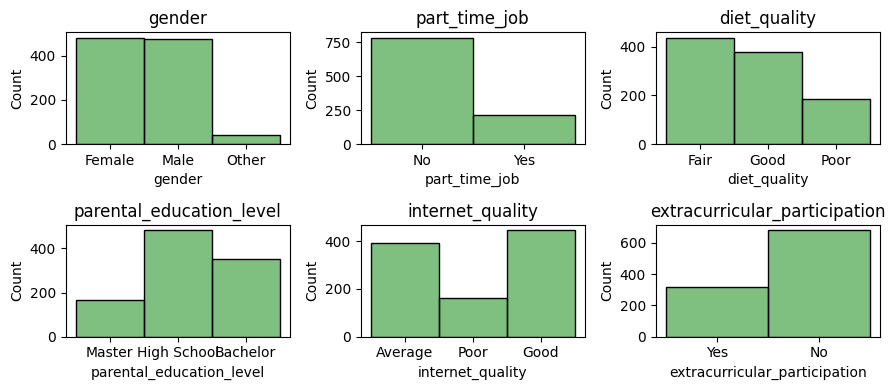

In [104]:
plt.figure(figsize=(9, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x=obj_cols[i], data=df, color="green", alpha=0.5)
    plt.title(obj_cols[i])

plt.tight_layout()
plt.show()

Cool! now lets study our data with numeric values.

In [105]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols = [col for col in num_cols]
num_cols

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

let's print and see some beautiful graphs for understanding numeric connections!

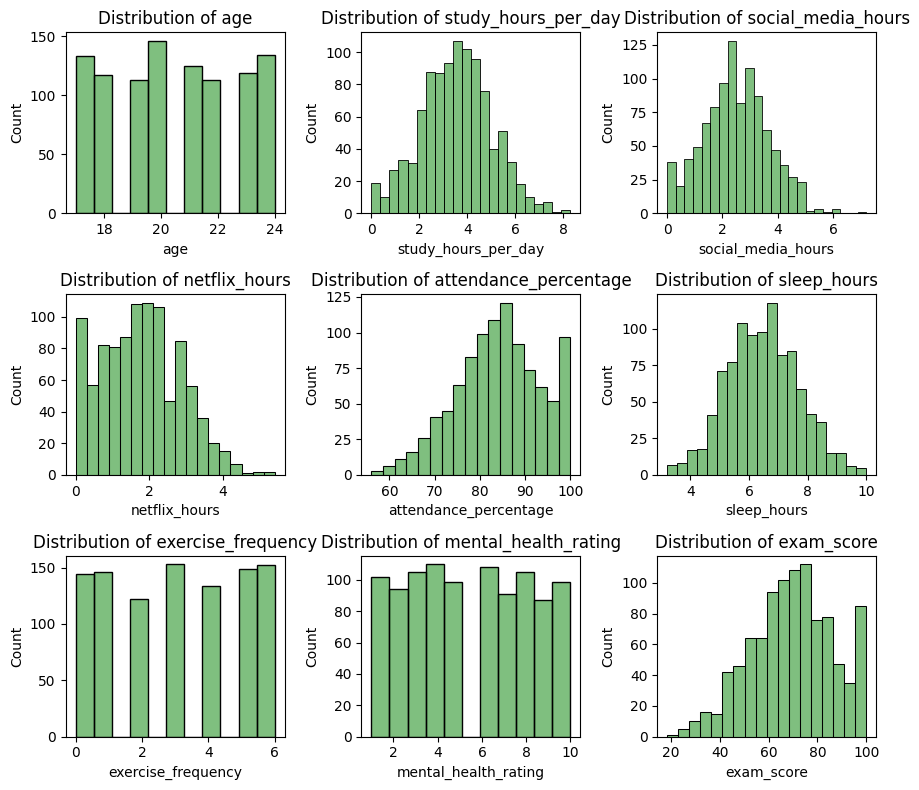

In [110]:
plt.figure(figsize=(9, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x=num_cols[i], data=df, color="green", alpha=0.5)
    plt.title('Distribution of ' + num_cols[i])

plt.tight_layout()
plt.show()

now let's see some info from our `dataframe` with reference to these curves

In [111]:
df[obj_cols].describe()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000
unique,3,2,3,3,3,2
top,Female,No,Fair,High School,Good,No
freq,481,785,437,483,447,682


In [112]:
df[num_cols].describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Let's see some correlation between values!

this will help us understand what values in our `dataframe` affect others and how much they affect them.

dor this we must remove some point-less data and perform some OHE Encoding and Label Encoding. This will help us convert our `object` Dtypes into `numerical` Dtypes which can be used in our model.

In [115]:
df_clean = df.drop("student_id", axis=1)
df_clean

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [118]:
for col in obj_cols:
    print(col)

gender
part_time_job
diet_quality
parental_education_level
internet_quality
extracurricular_participation


Encoding categorical data is essential in machine learning because most algorithms require numerical input. Two common encoding techniques are Label Encoding and One-Hot Encoding (OHE), each with different use cases and effects.

### Label Encoding
What it does: Converts each category in a categorical variable into a unique integer label. For example, categories ["Red", "Blue", "Green"] might be encoded as [1][2].

When to use:
-When the categorical variable is ordinal (has an inherent order), e.g., ["Low", "Medium", "High"].
-When you want to keep the feature space small, especially if there are many categories.

Limitations:
-Implies an ordinal relationship where none may exist, which can mislead some algorithms into assuming a ranking (e.g., 0 < 1 < 2) even if categories are nominal.

Advantages:
-Efficient, uses a single column.
-Works well with tree-based models that do not assume order.


### One-Hot Encoding (OHE)
What it does: Creates binary columns for each category of a categorical variable. Each column corresponds to one category, with 1 indicating presence and 0 absence. For example, ["Red", "Blue", "Green"] becomes three columns: color_red, color_blue, color_green.

When to use:
-When the categorical variable is nominal (no order).
-When you want to avoid introducing artificial ordinal relationships.
-When the number of categories is relatively small to avoid high dimensionality.

Limitations:
-Can lead to a large number of columns (curse of dimensionality) if categories are many.

Advantages:
-Maintains categorical independence.
-Preferred for linear models, neural networks, and algorithms sensitive to numeric ordering

*FOR THIS TASK:*
1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

### LABEL ENCODING

In [119]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [120]:
df_clean['dq_e'] = df_clean['diet_quality'].map(diet_quality)
df_clean['pel_e'] = df_clean['parental_education_level'].map(parental_education_level)
df_clean['iq_e'] = df_clean['internet_quality'].map(internet_quality)